# Self-Organizing Map (SOM) for PheWAS Data

## Import Libraries

In this section, we will import the necessary libraries for the SOM analysis.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
import category_encoders as ce

## Load Data

In [2]:
# Load the data
data = pd.read_csv('Data/hla-phewas-catalog.csv')
data.head()

,snp,phewas_code,phewas_string,cases,controls,category_string,odds_ratio,p,l95,u95,gene_name,maf,a1,a2,chromosome,nchrobs
0,HLA_A_01,8.0,Intestinal infection,683,27384,infectious diseases,0.887,0.1654,0.749,1.051,A,0.1655,P,A,6,57678
1,HLA_A_0101,8.0,Intestinal infection,683,27384,infectious diseases,0.882,0.1470,0.745,1.045,A,0.1653,P,A,6,57678
2,HLA_A_02,8.0,Intestinal infection,683,27384,infectious diseases,0.928,0.3378,0.797,1.081,A,0.3025,P,A,6,57678
3,HLA_A_0201,8.0,Intestinal infection,683,27384,infectious diseases,0.919,0.2778,0.789,1.070,A,0.2906,P,A,6,57678
4,HLA_A_03,8.0,Intestinal infection,683,27384,infectious diseases,1.107,0.2359,0.936,1.310,A,0.1435,P,A,6,57678


In [3]:
# Check the shape of the data
data.shape

(240768, 16)

In [4]:
# Check the columns of the data
data.columns

Index(['snp', 'phewas_code', 'phewas_string', 'cases', 'controls',
       'category_string', 'odds_ratio', 'p', 'l95', 'u95', 'gene_name', 'maf',
       'a1', 'a2', 'chromosome', 'nchrobs'],
      dtype='object')

In [5]:
# Describe the data
data.describe()

,phewas_code,cases,controls,odds_ratio,p,l95,u95,maf,chromosome,nchrobs
count,240768.000000,240768.000000,240768.000000,240768.000000,2.407680e+05,240768.000000,240768.000000,240768.000000,240768.0,240768.0
mean,476.797734,605.363304,22841.290205,1.008905,4.986146e-01,0.639304,1.825813,0.080838,6.0,57678.0
std,214.739026,1021.123758,3965.917375,0.353697,2.933468e-01,0.263825,5.089146,0.082685,0.0,0.0
min,8.000000,40.000000,9354.000000,0.000000,4.613000e-54,0.000000,0.000000,0.010000,6.0,57678.0
25%,290.275000,104.000000,21062.000000,0.856000,2.444000e-01,0.478000,1.222000,0.022160,6.0,57678.0
50%,452.100000,264.500000,23598.000000,0.994000,4.958000e-01,0.683000,1.480000,0.044105,6.0,57678.0
75%,627.625000,672.250000,25503.250000,1.132000,7.521000e-01,0.829000,1.999000,0.123475,6.0,57678.0
max,994.200000,12197.000000,28737.000000,34.700000,1.000000e+00,18.940000,999.999000,0.453300,6.0,57678.0


In [6]:
# Check the data types of the columns
data.dtypes

snp                 object
phewas_code        float64
phewas_string       object
cases                int64
controls             int64
category_string     object
odds_ratio         float64
p                  float64
l95                float64
u95                float64
gene_name           object
maf                float64
a1                  object
a2                  object
chromosome           int64
nchrobs              int64
dtype: object

In [7]:
# Check the missing values in the data
data.isnull().sum()

snp                  0
phewas_code          0
phewas_string        0
cases                0
controls             0
category_string    176
odds_ratio           0
p                    0
l95                  0
u95                  0
gene_name            0
maf                  0
a1                   0
a2                   0
chromosome           0
nchrobs              0
dtype: int64

In [8]:
# Print the specific rows with missing values
data[data.isnull().any(axis=1)]

,snp,phewas_code,phewas_string,cases,controls,category_string,odds_ratio,p,l95,u95,gene_name,maf,a1,a2,chromosome,nchrobs
225280,HLA_A_01,797.2,Septic shock,451,27328,NaN,1.079,0.4575,0.883,1.317,A,0.16550,P,A,6,57678
225281,HLA_A_0101,797.2,Septic shock,451,27328,NaN,1.080,0.4487,0.885,1.319,A,0.16530,P,A,6,57678
225282,HLA_A_02,797.2,Septic shock,451,27328,NaN,0.972,0.7613,0.806,1.171,A,0.30250,P,A,6,57678
225283,HLA_A_0201,797.2,Septic shock,451,27328,NaN,1.011,0.9078,0.839,1.218,A,0.29060,P,A,6,57678
225284,HLA_A_03,797.2,Septic shock,451,27328,NaN,0.866,0.1961,0.697,1.077,A,0.14350,P,A,6,57678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225451,HLA_DRB1_14,797.2,Septic shock,451,27328,NaN,1.086,0.7154,0.698,1.690,DRB1,0.02207,P,A,6,57678
225452,HLA_DRB1_1401,797.2,Septic shock,451,27328,NaN,0.745,0.3377,0.408,1.360,DRB1,0.01644,P,A,6,57678
225453,HLA_DRB1_15,797.2,Septic shock,451,27328,NaN,0.847,0.1330,0.683,1.052,DRB1,0.14790,P,A,6,57678
225454,HLA_DRB1_1501,797.2,Septic shock,451,27328,NaN,0.837,0.1124,0.671,1.043,DRB1,0.14080,P,A,6,57678


In [9]:
# Check that all the septic shock categories are missing
data[data['phewas_string'] == 'Septic shock'].shape

(176, 16)

In [10]:
# Impute the missing values with infectious diseases as is closest to the missing values
data['category_string'] = data['category_string'].fillna('infectious diseases')

# Check the missing values in the data
data.isnull().sum()

snp                0
phewas_code        0
phewas_string      0
cases              0
controls           0
category_string    0
odds_ratio         0
p                  0
l95                0
u95                0
gene_name          0
maf                0
a1                 0
a2                 0
chromosome         0
nchrobs            0
dtype: int64

In [11]:
# Check for unique values in chromosome and nchrobs column
len(data['chromosome'].unique())

1

In [12]:
len(data['nchrobs'].unique())
# Drop chromosome and nchrobs columns as they are the same for all the rows (because the data is from the same chromosome)
data = data.drop(['chromosome', 'nchrobs'], axis=1)

In [13]:
# Print the gene names
data['gene_name'].unique()
# Add a new column to the data to indicate the class based on the gene name
data['gene_class'] = np.where(data['gene_name'].isin(['A', 'B', 'C']), 1, 2)

In [14]:
# Drop phewas_string column as it is not needed
data = data.drop(['phewas_string'], axis=1)

# Exploratory Data Analysis

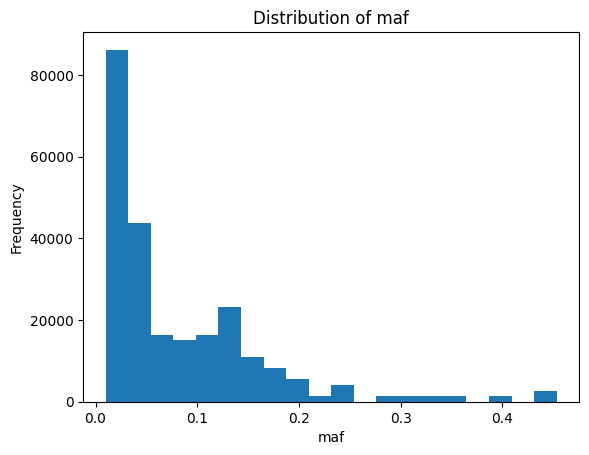

In [15]:
# Plot the distribution of the maf column
plt.hist(data['maf'], bins=20)
plt.xlabel('maf')
plt.ylabel('Frequency')
plt.title('Distribution of maf')
plt.show()

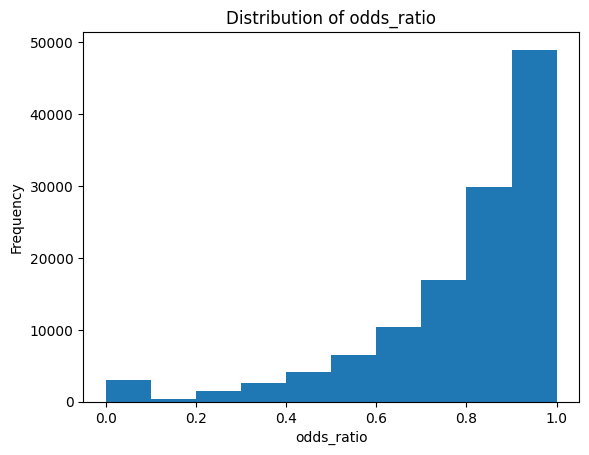

In [16]:
# Plot the distribution of the odds_ratio column
plt.hist(data['odds_ratio'], range=(0, 1))
plt.xlabel('odds_ratio')
plt.ylabel('Frequency')
plt.title('Distribution of odds_ratio')
plt.show()

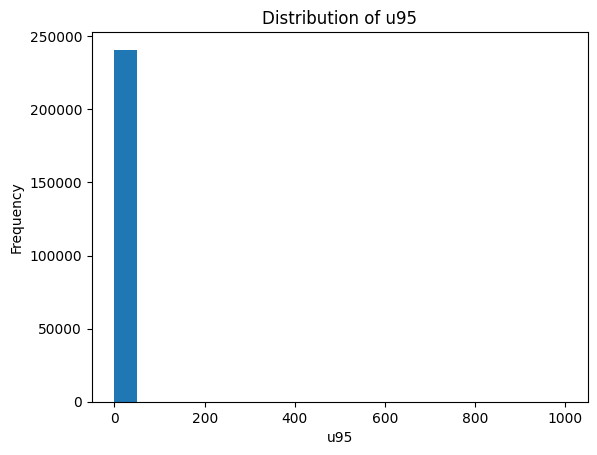

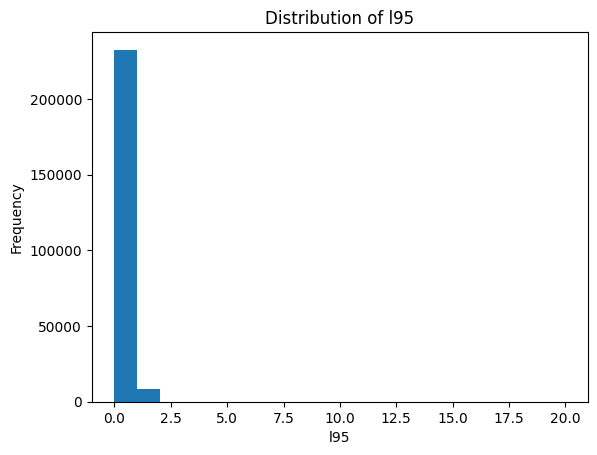

In [17]:
# Plot the distribution of the u95 and l95 columns
plt.hist(data['u95'], bins=20)
plt.xlabel('u95')
plt.ylabel('Frequency')
plt.title('Distribution of u95')
plt.show()

plt.hist(data['l95'], bins=20, range=(0, 20))
plt.xlabel('l95')
plt.ylabel('Frequency')
plt.title('Distribution of l95')
plt.show()

(array([13430., 12018., 11886., 12014., 12176., 12114., 12164., 11855.,
        11763., 11878., 12106., 11786., 11563., 11692., 11635., 11498.,
        11409., 11533., 11511., 14737.]),
 array([4.613e-54, 5.000e-02, 1.000e-01, 1.500e-01, 2.000e-01, 2.500e-01,
        3.000e-01, 3.500e-01, 4.000e-01, 4.500e-01, 5.000e-01, 5.500e-01,
        6.000e-01, 6.500e-01, 7.000e-01, 7.500e-01, 8.000e-01, 8.500e-01,
        9.000e-01, 9.500e-01, 1.000e+00]),
 <BarContainer object of 20 artists>)

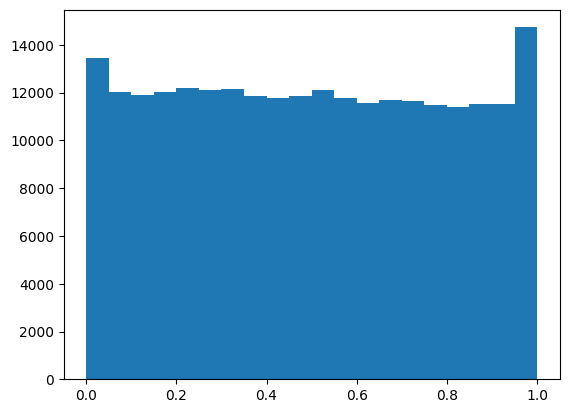

In [18]:
# Plot the distribution of the pval column
plt.hist(data['p'], bins=20)

# Data Preprocessing

In [19]:
# Count number of unique values in each column
data.nunique()

snp                  176
phewas_code         1368
cases                720
controls             198
category_string       17
odds_ratio          2966
p                  19748
l95                 1669
u95                 6571
gene_name              8
maf                  151
a1                     2
a2                     2
gene_class             2
dtype: int64

In [20]:
# Encode HLA alleles using binary encoding from category_encoders
encoder = ce.BinaryEncoder(cols=['snp'])
data = encoder.fit_transform(data)
data.head()

# Check the shape of the data
data.shape

(240768, 21)

In [21]:
# Encode other categorical columns using one-hot encoding
data = pd.get_dummies(data, columns=['category_string'])
data = pd.get_dummies(data, columns=['gene_name'])

# Combine a1 and a2 columns
data['a1_a2'] = data['a1'] + data['a2']
data = data.drop(['a1', 'a2'], axis=1)

# Encode a1_a2 column using one-hot encoding
data = pd.get_dummies(data, columns=['a1_a2'])


data.head()

data.shape

(240768, 44)

In [22]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale the data
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,snp_0,snp_1,snp_2,snp_3,snp_4,snp_5,snp_6,snp_7,phewas_code,cases,...,gene_name_A,gene_name_B,gene_name_C,gene_name_DPA1,gene_name_DPB1,gene_name_DQA1,gene_name_DQB1,gene_name_DRB1,a1_a2_AP,a1_a2_PA
0,-0.62115,-0.755929,-0.923381,-0.923381,-1.0,-1.0,-1.0,1.0,-2.183109,0.076031,...,2.401922,-0.52475,-0.425685,-0.170996,-0.38772,-0.270501,-0.326984,-0.434959,-0.131685,0.131685
1,-0.62115,-0.755929,-0.923381,-0.923381,-1.0,-1.0,1.0,-1.0,-2.183109,0.076031,...,2.401922,-0.52475,-0.425685,-0.170996,-0.38772,-0.270501,-0.326984,-0.434959,-0.131685,0.131685
2,-0.62115,-0.755929,-0.923381,-0.923381,-1.0,-1.0,1.0,1.0,-2.183109,0.076031,...,2.401922,-0.52475,-0.425685,-0.170996,-0.38772,-0.270501,-0.326984,-0.434959,-0.131685,0.131685
3,-0.62115,-0.755929,-0.923381,-0.923381,-1.0,1.0,-1.0,-1.0,-2.183109,0.076031,...,2.401922,-0.52475,-0.425685,-0.170996,-0.38772,-0.270501,-0.326984,-0.434959,-0.131685,0.131685
4,-0.62115,-0.755929,-0.923381,-0.923381,-1.0,1.0,-1.0,1.0,-2.183109,0.076031,...,2.401922,-0.52475,-0.425685,-0.170996,-0.38772,-0.270501,-0.326984,-0.434959,-0.131685,0.131685


# Train the Self-Organizing Map (SOM)

# Visualize the SOM